![](https://i.imgur.com/wcCJf9v.png)

# Import libraries 📚

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import wandb
import squarify

import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from wordcloud import WordCloud,STOPWORDS
from matplotlib.ticker import FuncFormatter
from palettable.scientific.sequential import Acton_14,Bamako_12,Hawaii_5
from palettable.tableau import Tableau_20

import warnings
warnings.filterwarnings("ignore")

<img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67">

I will be integrating W&B for visualizations and logging artifacts!

> [Kaggle ML & DS Survey W&B Dashboard](https://wandb.ai/ruchi798/kaggle-survey?workspace=user-ruchi798)🏋️‍♀️
>
> - To get the API key, an account is to be created on the [website](https://wandb.ai/home) first.
> - Next, use secrets to use API Keys more securely 🤫

In [2]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("api_key")

CONFIG = {'competition': 'kaggle-survey', '_wandb_kernel': 'ruch'}

os.environ["WANDB_SILENT"] = "true"

! wandb login $api_key

In [3]:
df = pd.read_csv("../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


How many features do we have in store? 🍩

In [4]:
lst = df.columns
len(lst)

369

In [5]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    country=[]
    lat=[]
    long=[]
    location_df = pd.DataFrame()
    for i in df['Q3'].unique(): 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            country.append(i)
        except:
            lat.append(np.nan)
            long.append(np.nan)
            country.append(np.nan)
    location_df['Country'] = country
    location_df['Latitude'] = lat
    location_df['Longitude'] = long
    
    return location_df

# map_data = feature_generation(df)
# map_data = map_data.dropna()

# df = df.merge(map_data, how='outer', left_on='Q3', right_on='Country')
# df = df.drop(['Country'], axis = 1)

In [6]:
# #====== Saving to csv files and creating artifacts ======
# df.to_csv("dataset_lat_long.csv")

# run = wandb.init(project='kaggle-survey', name='dataset_lat_long',anonymous="allow")

# artifact = wandb.Artifact('dataset_lat_long', type='dataset')

# #====== Add a file to the artifact's contents ======
# artifact.add_file("dataset_lat_long.csv")

# #====== Save the artifact version to W&B and mark it as the output of this run ======
# run.log_artifact(artifact)

# run.finish()

In [7]:
run = wandb.init(anonymous="allow")
artifact = run.use_artifact('ruchi798/kaggle-survey/dataset_lat_long:v0', type='dataset')
artifact_dir = artifact.download()
run.finish()

path = os.path.join(artifact_dir,"dataset_lat_long.csv")
df = pd.read_csv(path)
df = df.drop(columns=["Unnamed: 0"])

2021-11-15 08:08:21.514220: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:08:21.514839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



In [8]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def map_df(df,col1,col2):
    
    df = df.iloc[1:]
    df = pd.DataFrame(df[[col1, col2, 'Latitude', 'Longitude']]).groupby([col1, col2,'Latitude', 'Longitude']).size().reset_index(name='count')
    df[col2] = df[col2] + " : " + df['count'].astype(str)
    map_data = pd.DataFrame(df[col2].groupby([df[col1]]).apply(list).reset_index()) 
    map_data = pd.merge(map_data,df[[col1,'Latitude', 'Longitude']],on=col1, how='left')
    map_data = map_data.drop_duplicates(subset = [col1]).reset_index()
    
    world_map= folium.Map(tiles="Stamen Watercolor")
    mc = MarkerCluster()
    for idx, row in map_data.iterrows():
        if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
            popup = """
            Country : <b>%s</b><br>
            Degree : <b>%s</b><br>
            """ % (row[col1], row[col2])
            mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
        world_map.add_child(mc)
    
    return world_map

def plot_bar(col, palette):
    title = df[col][0]
    title = title.replace("- Selected Choice","")
    plt.figure(figsize=(20,20))
    plt.yticks(fontsize=16)
    sns.countplot(y=col,data=df.iloc[1:],order=df.iloc[1:][col].value_counts().index,palette=palette,linewidth=3)
    plt.title(title,font="Serif", size=20)
    plt.show()
    
#====== Function to plot wandb bar chart ======
def plot_wb_bar(df,col1,col2,title): 
    name = col1
    run = wandb.init(project='kaggle-survey', job_type='image-visualization',name=name)
    
    dt = [[label, val] for (label, val) in zip(df[col1], df[col2])]
    table = wandb.Table(data=dt, columns = [col1,col2])
    wandb.log({name : wandb.plot.bar(table, col1,col2,title=title)})

    run.finish()
    
#====== Function to create a dataframe of value counts ======
def count_values(df,col,top=False):
    df = pd.DataFrame(df[col].value_counts().reset_index().values,columns=[col, "counts"])
    if top==True: df=df[:10]
    return df

# Gender Distribution 📊

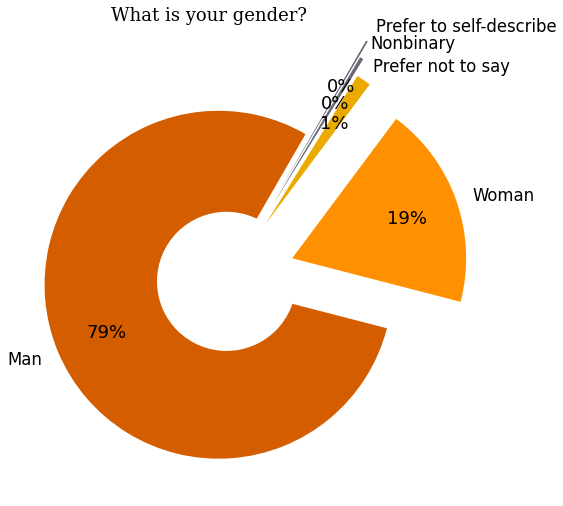

In [9]:
title = df['Q2'][0]
title = title.replace("- Selected Choice","")
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle(title, fontsize = 20, font="Serif")
explode = (0.05, 0.4, 0.4, 0.5, 0.6)
labels = list(df.iloc[1:].Q2.value_counts().index)
sizes = df.iloc[1:].Q2.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#d45d00","#ff9100","#eaaa00","#6d6875","#5e6875"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

wmap = map_df(df, 'Q3', 'Q2')
wmap

In [10]:
plot_wb_bar(count_values(df[1:],"Q2"),"Q2", "counts","Gender distribution")

2021-11-15 08:08:39.202996: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:08:39.203179: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Highest level of formal education 🎓

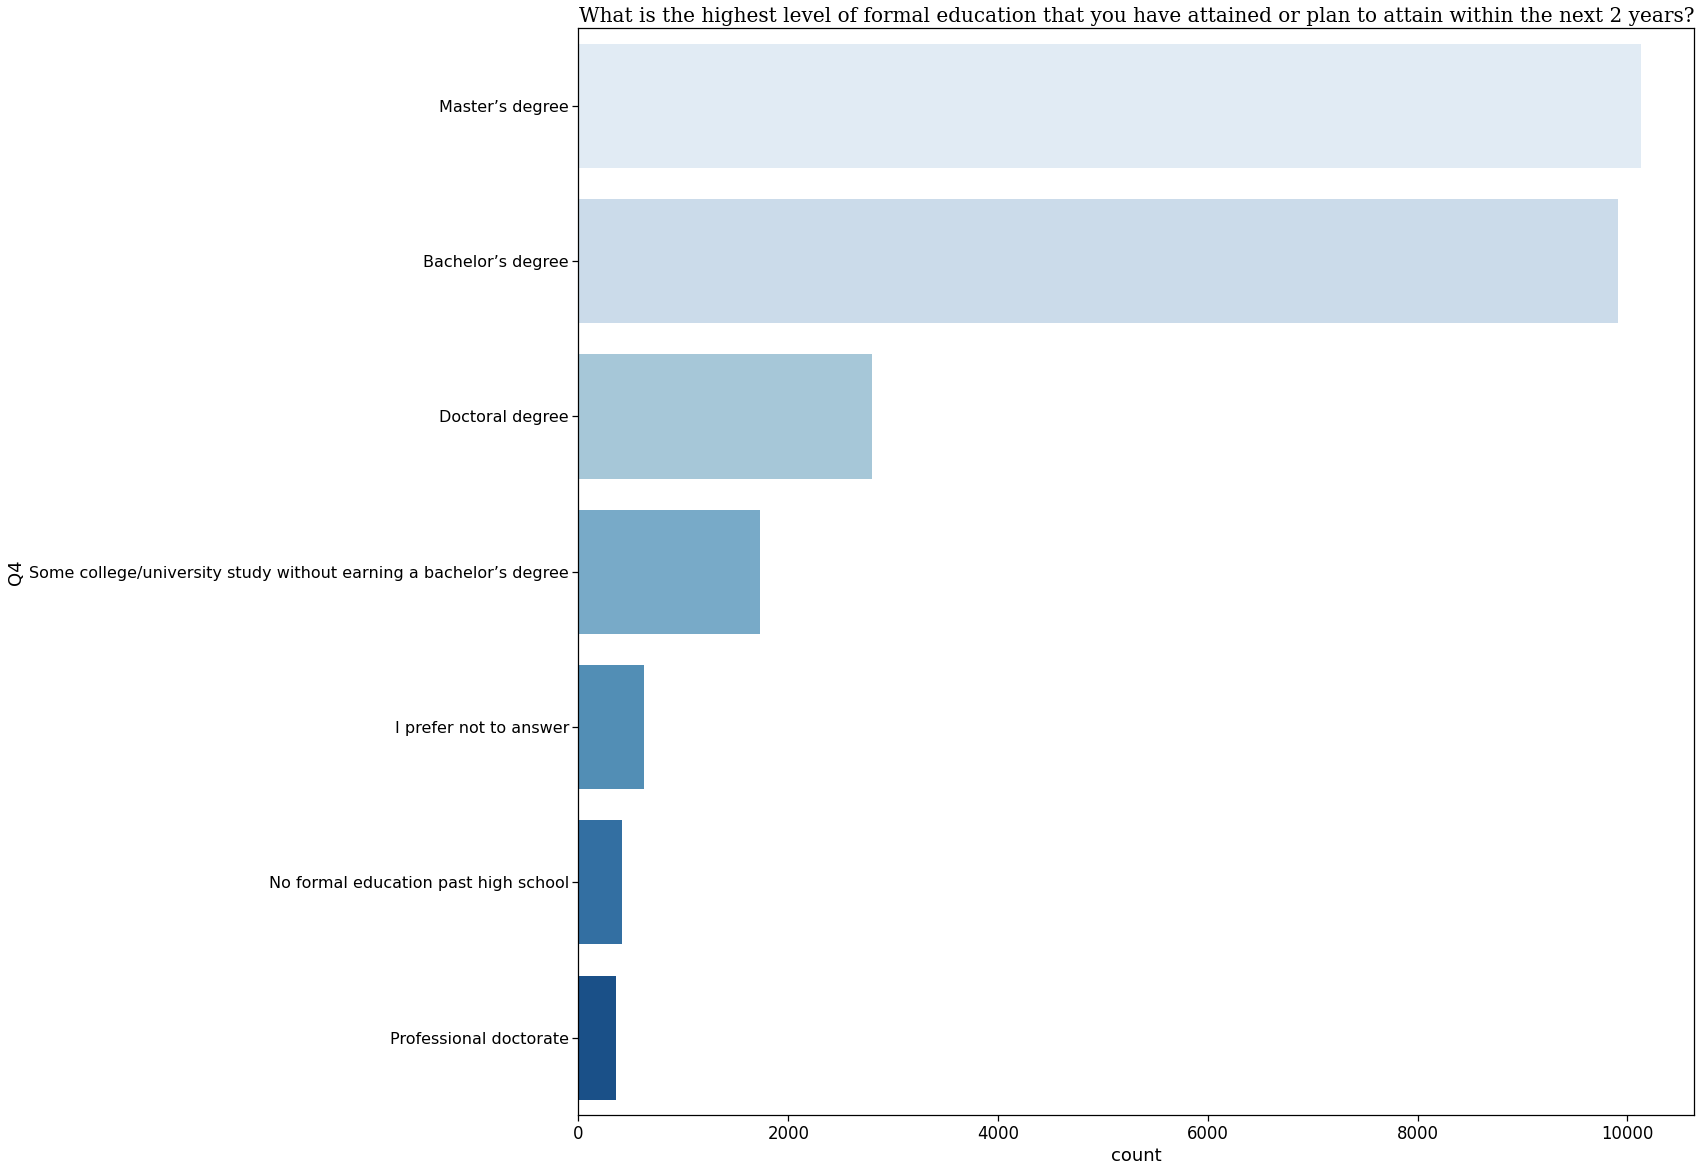

In [11]:
plot_bar('Q4',"Blues")

In [12]:
wmap = map_df(df, 'Q3', 'Q4')
wmap

In [13]:
plot_wb_bar(count_values(df[1:],"Q4"),"Q4", "counts","Highest level of formal education distribution")

2021-11-15 08:08:54.162921: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:08:54.162976: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Years of Experience of Writing Code 👩‍💻

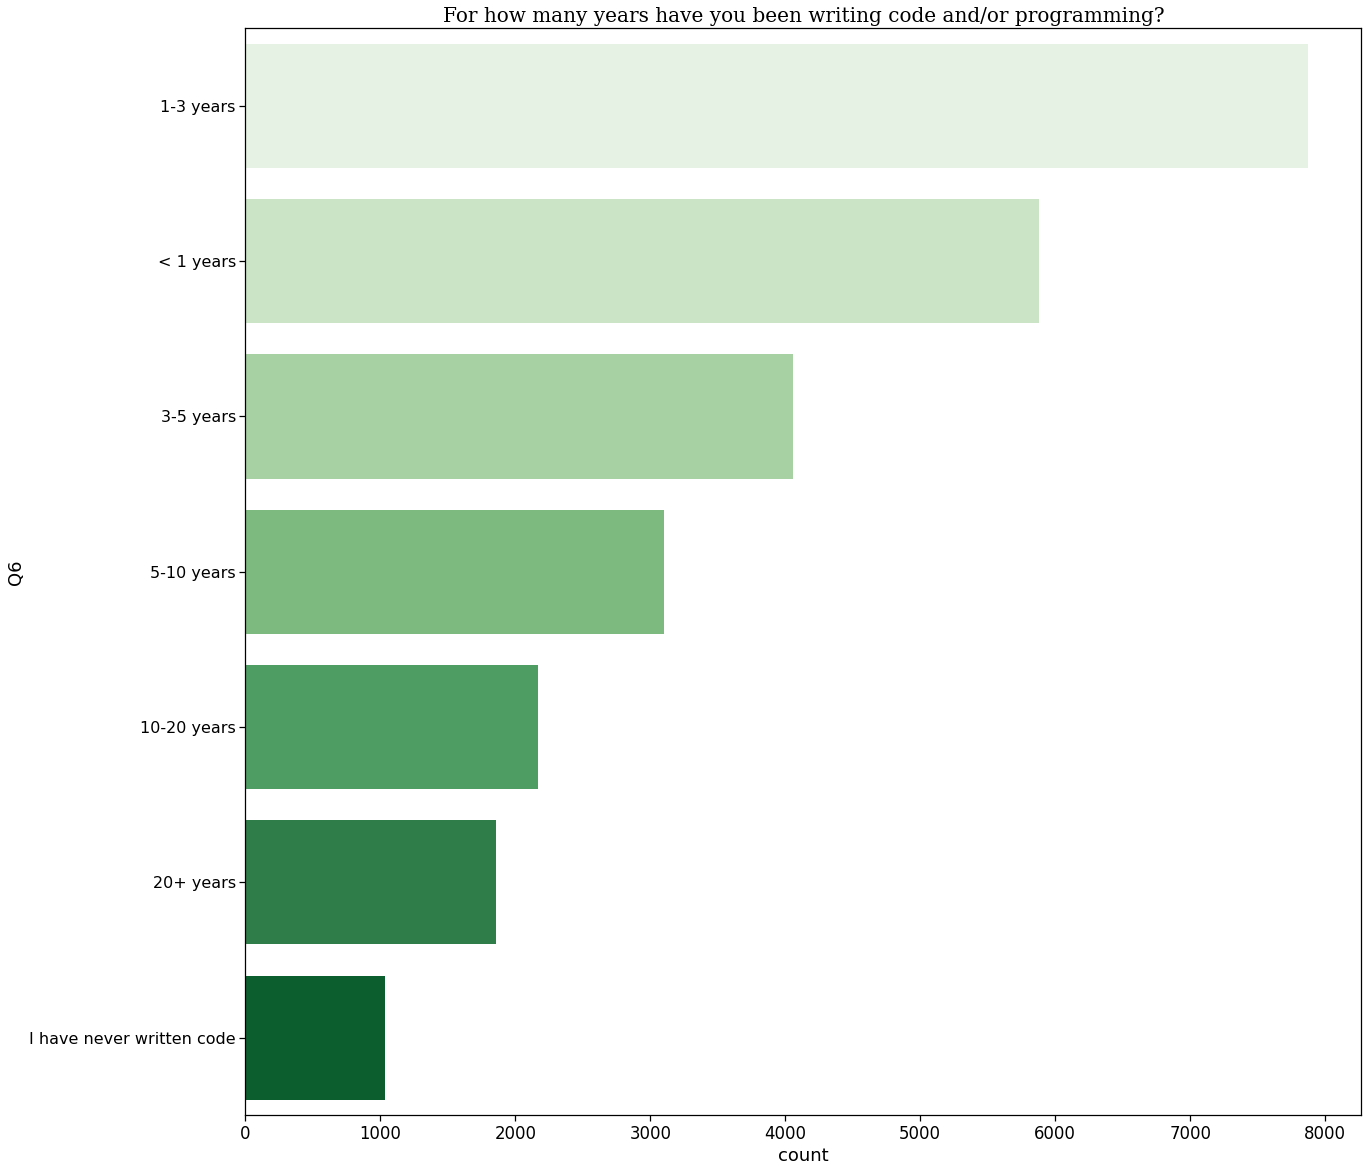

In [14]:
plot_bar('Q6',"Greens")

In [15]:
wmap = map_df(df, 'Q3', 'Q6')
wmap

In [16]:
plot_wb_bar(count_values(df[1:],"Q6"),"Q6", "counts","Years of experience of writing code distribution")

2021-11-15 08:09:09.250698: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:09:09.250961: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Job Titles 🧑‍💼

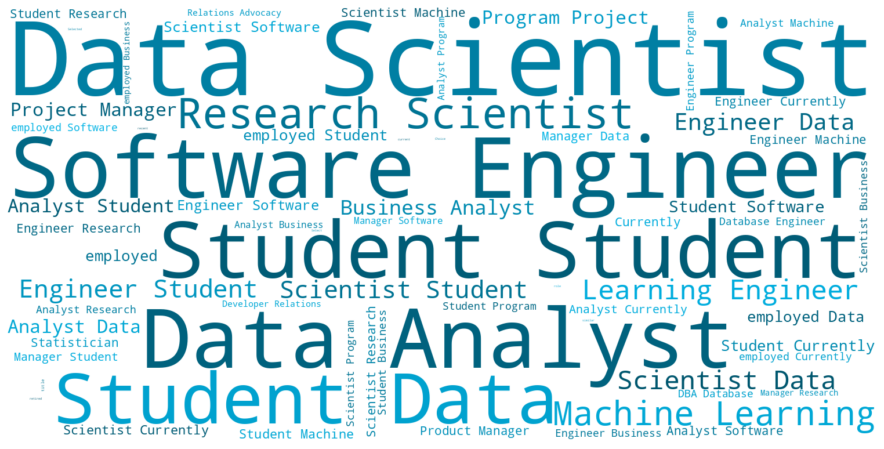

In [17]:
# color function for the wordcloud
def color_wc(word=None,font_size=None,position=None, orientation=None,font_path=None, random_state=None):
    h = int(360.0 * 135.0 / 255.0)
    s = int(190.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(40, 80)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


fig = plt.gcf()
fig.set_size_inches(16, 8)
wc = WordCloud(stopwords=STOPWORDS,background_color="white", contour_width=2, contour_color='orange',width=1500, height=750,color_func=color_wc,max_words=150, max_font_size=256,random_state=42)
wc.generate(' '.join(df['Q5']))
fig = plt.imshow(wc, interpolation="bilinear")
fig = plt.axis('off')

In [18]:
wmap = map_df(df, 'Q3', 'Q5')
wmap

In [19]:
plot_wb_bar(count_values(df[1:],"Q5"),"Q5", "counts","Job titles distribution")

2021-11-15 08:09:25.594827: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:09:25.594884: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Programming language used on a regular basis 🧑‍🍳

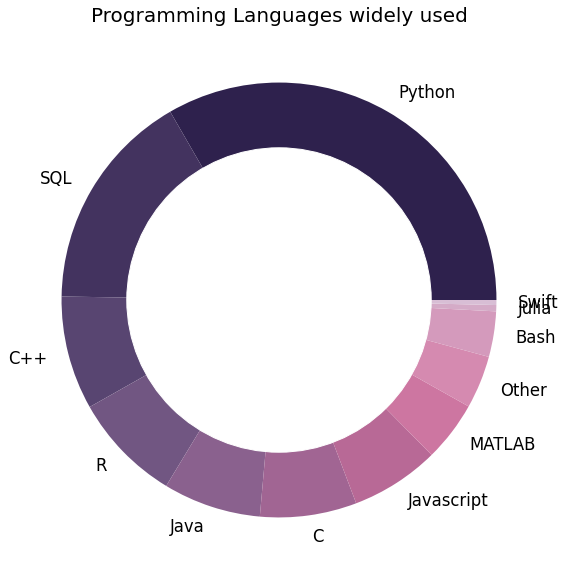

In [20]:
def get_count(question_num, parts):
    questions = []
    questions = ['Q'+ str(question_num) +'_Part_'+ str(j) for j in range(1, parts)]
    questions.append('Q'+ str(question_num) + '_OTHER')
    
    categories = []
    values = []
    for i in questions:
        category = df[i].value_counts().index[0]
        val = df[i].value_counts()[0]
        
        categories.append(category)
        values.append(val)
       
    combined_df = pd.DataFrame()
    combined_df['Category'] = categories
    combined_df['Value'] = values
    
    combined_df = combined_df.sort_values(['Value'],ascending=False)
    
    return combined_df

def plot_donut(data, title, colors):
    plt.figure(figsize=(16,10))
    
    circle = plt.Circle((0,0), 0.7, color='white')
    plt.rcParams['text.color'] = 'black'
    
    plt.pie(data['Value'], labels=data['Category'], colors=colors)
    
    p = plt.gcf()
    p.gca().add_artist(circle)
    
    plt.title(title, size=20)
    plt.show()

programming_lang = get_count(7,12)
plot_donut(programming_lang, 'Programming Languages widely used',Acton_14.hex_colors)

In [21]:
programming_lang = programming_lang.rename(columns={"Category": "Q7"})
plot_wb_bar(programming_lang,"Q7", "Value","Programming Languages widely used distribution")

2021-11-15 08:09:40.340115: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:09:40.340169: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Recommended Programming language for an aspiring data scientist🧑‍🏫

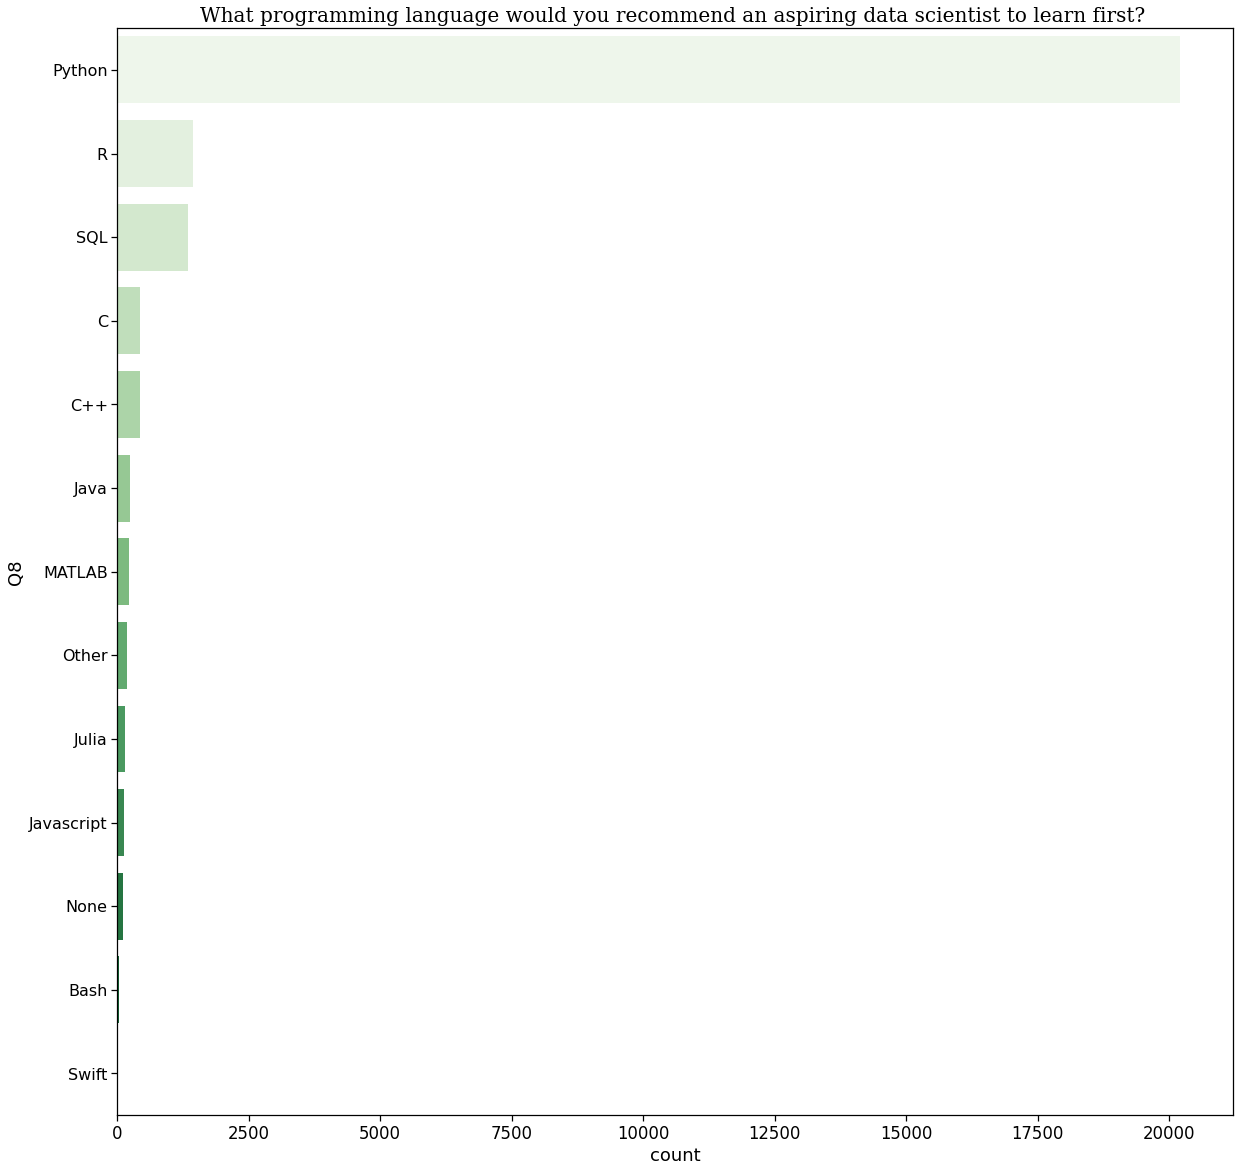

In [22]:
plot_bar('Q8',"Greens")

In [23]:
plot_wb_bar(count_values(df[1:],"Q8"),"Q8", "counts","Recommended programming language for an aspiring data scientist distribution")

2021-11-15 08:09:55.165395: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:09:55.165450: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Integrated development environments (IDE)

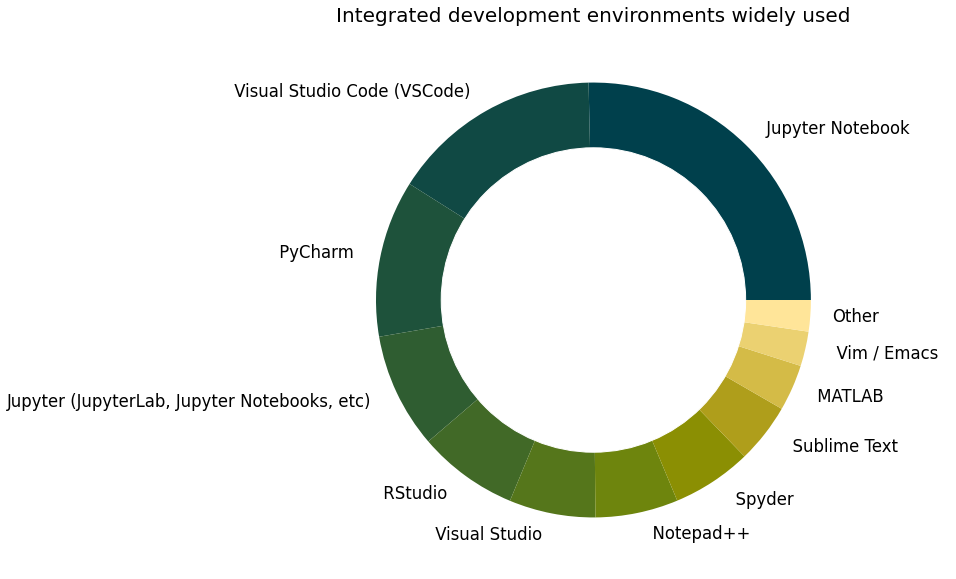

In [24]:
ide = get_count(9,12)
plot_donut(ide, 'Integrated development environments widely used',Bamako_12.hex_colors)

In [25]:
ide = ide.rename(columns={"Category": "Q9"})
plot_wb_bar(ide,"Q9", "Value","Integrated development environments widely used distribution")

2021-11-15 08:10:09.998147: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:10:09.998199: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Hosted notebook products 📓

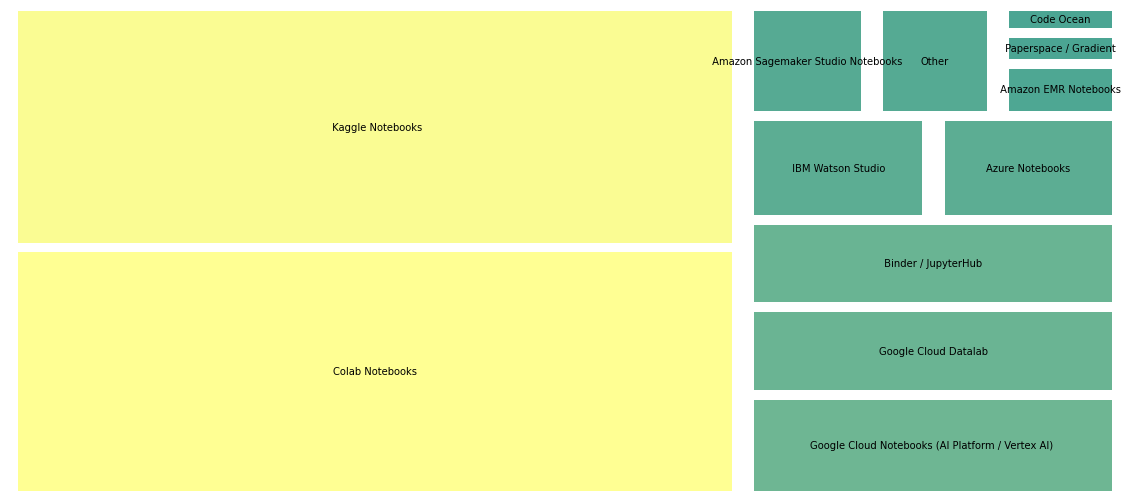

In [26]:
hosted_nb = get_count(10,12)

norm = matplotlib.colors.Normalize(vmin=min(hosted_nb.Value), vmax=max(hosted_nb.Value))
color = [matplotlib.cm.summer(norm(value)) for value in hosted_nb.Value]

labels = hosted_nb.Category
sizes = hosted_nb.Value

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 9)
squarify.plot(sizes,color=color, label = labels, pad = True, alpha=.7, text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()

In [27]:
hosted_nb = hosted_nb.rename(columns={"Category": "Q10"})
plot_wb_bar(hosted_nb,"Q10", "Value","Hosted notebook distribution")

2021-11-15 08:10:24.800989: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:10:24.801043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Computing platform ⚙️

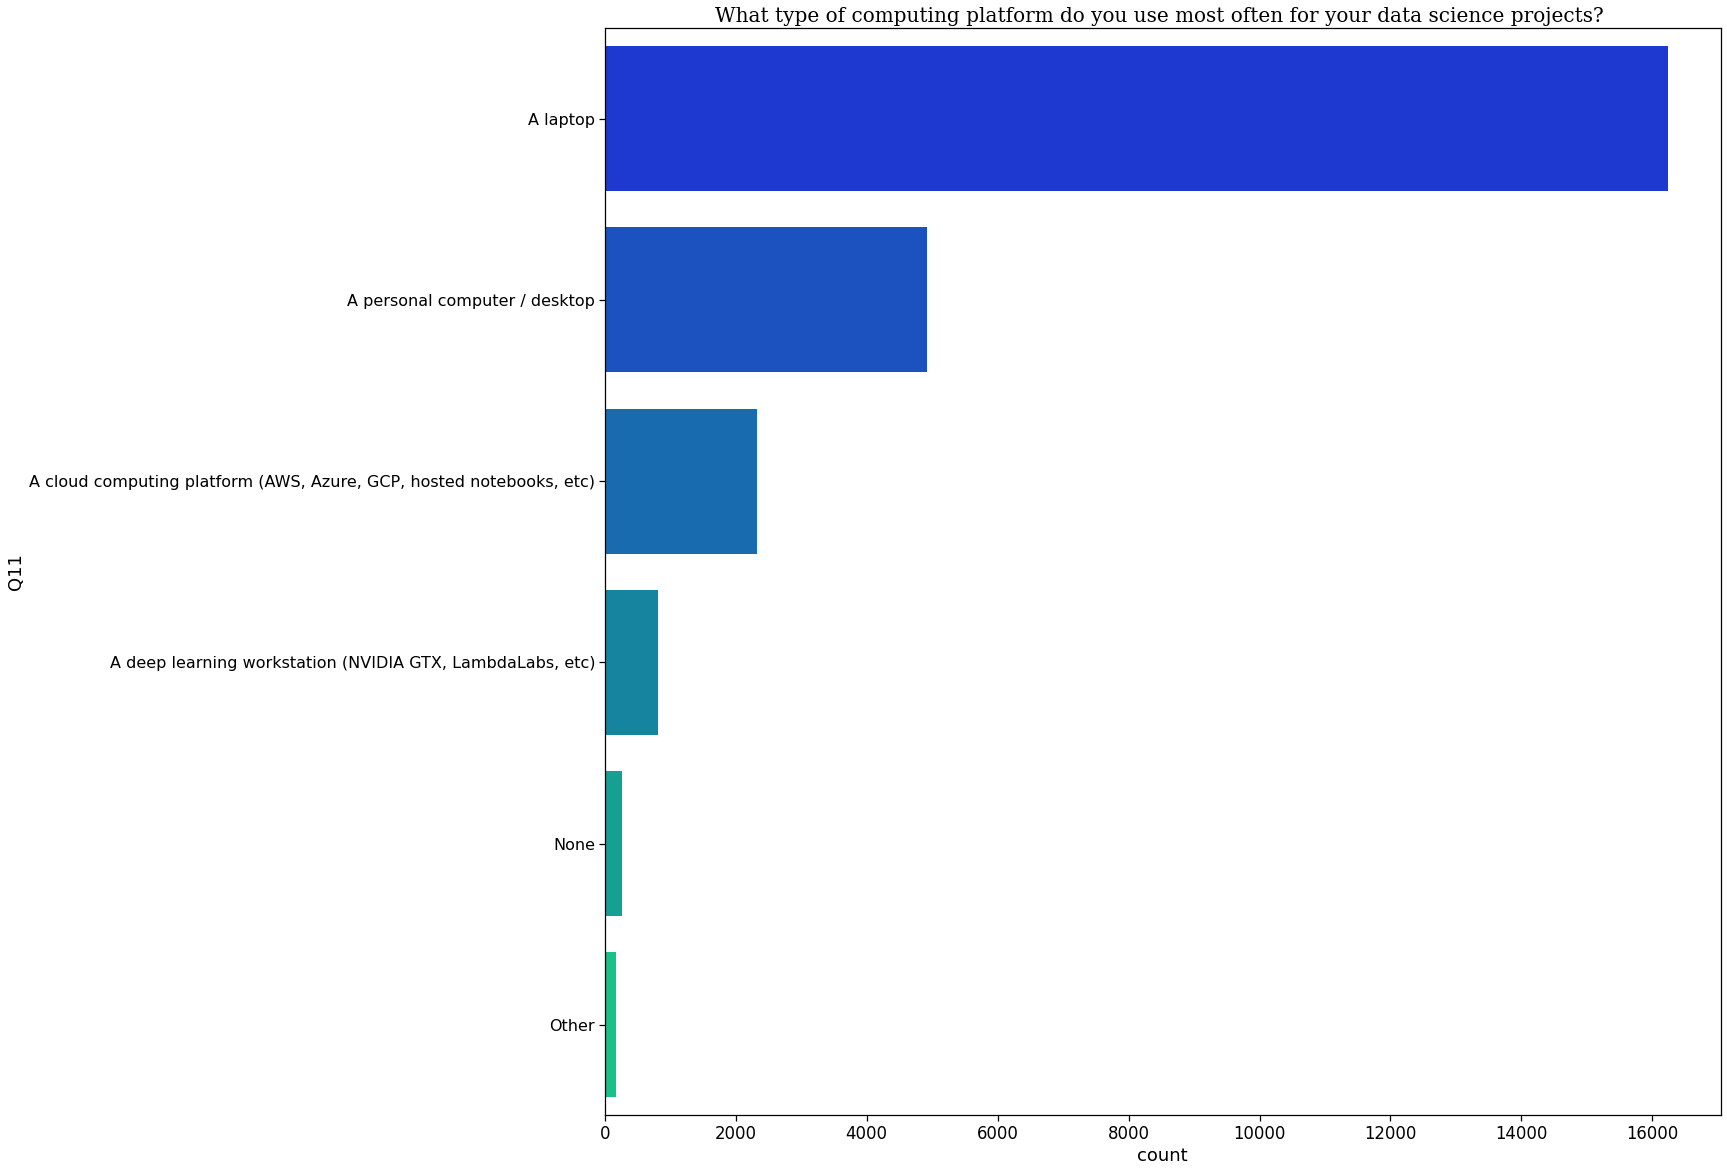

In [28]:
plot_bar('Q11',"winter")

In [29]:
plot_wb_bar(count_values(df[1:],"Q11"),"Q11", "counts","Computing platform distribution")

2021-11-15 08:10:39.905341: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:10:39.905676: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Specialized Hardware ⚙️🌶️

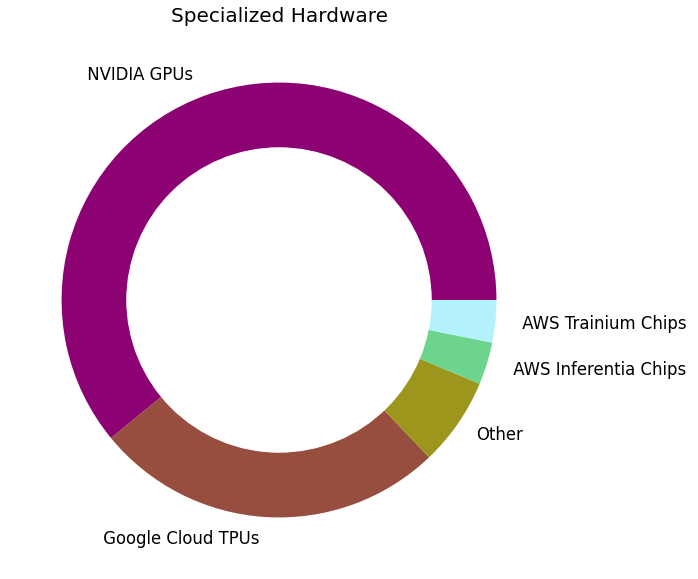

In [30]:
sph = get_count(12,5)
plot_donut(sph, 'Specialized Hardware',Hawaii_5.hex_colors)

In [31]:
sph = sph.rename(columns={"Category": "Q12"})
plot_wb_bar(sph,"Q12", "Value","Specialized Hardware distribution")

2021-11-15 08:10:54.568985: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-11-15 08:10:54.569040: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

CondaEnvException: Unable to determine environment

Please re-run this command with one of the following options:

* Provide an environment name via --name or -n
* Re-run this command inside an activated conda environment.



# Job Title vs Programming Language 🧑‍🍳

In [32]:
def visualize_relation(start_slice, end_slice, new_col_names, old_col, new_col, xlabel, title, p1,p2):
    df_sliced = df.iloc[:,start_slice:end_slice].iloc[1:]

    df_sliced = df_sliced.rename(columns=new_col_names).fillna(0).replace('[^\\d]',1, regex=True)
    df_sliced = df_sliced.join(df[old_col])

    df_sliced_stats = pd.DataFrame()
    for col in df_sliced.columns[:-1]:
        df_sliced_stats[col] = df_sliced.groupby(old_col)[col].mean().values

    df_sliced = df_sliced.rename(columns={old_col:new_col})
    df_sliced_stats.index = df_sliced.groupby(new_col)[list(new_col_names.items())[0][1]].mean().index

    cmap = sns.diverging_palette(p1, p2, as_cmap=True)
    display(df_sliced_stats.style.background_gradient(cmap, axis=0).format("{:.0%}"))

    df_sliced_stats[new_col] = df_sliced_stats.index
    fig = plt.figure(figsize=(14, 16))
    ax = fig.add_subplot(111)
    for i in range(len(df_sliced_stats.columns[:-1])):
        color = Tableau_20.hex_colors[i]
        col = df_sliced_stats.columns[i]
        df_sliced_stats.plot(kind="scatter", x=col,y=new_col, color=color, label=col,ax=ax, s=100)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.set_xlabel(xlabel)
    ax.legend(loc='upper right',bbox_to_anchor=(1.35, 1), frameon=False)
    ax.set_title(title,font="Serif")
    plt.show()

,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
Job Title,,,,,,,,,,,,,
Business Analyst,68%,22%,48%,7%,9%,9%,10%,1%,1%,3%,5%,3%,9%
Currently not employed,87%,19%,37%,13%,15%,12%,13%,1%,1%,6%,9%,3%,8%
DBA/Database Engineer,74%,13%,81%,16%,15%,22%,20%,2%,3%,25%,7%,1%,16%
Data Analyst,78%,31%,61%,7%,9%,9%,10%,1%,1%,4%,8%,1%,9%
Data Engineer,88%,18%,70%,12%,15%,21%,19%,1%,1%,19%,7%,0%,13%
Data Scientist,93%,32%,55%,10%,13%,12%,11%,2%,1%,12%,9%,0%,8%
Developer Relations/Advocacy,68%,11%,39%,13%,21%,27%,42%,3%,6%,10%,7%,0%,25%
Machine Learning Engineer,93%,10%,33%,18%,28%,19%,14%,1%,1%,13%,14%,0%,7%
Other,71%,17%,30%,13%,12%,11%,13%,1%,1%,7%,9%,4%,14%


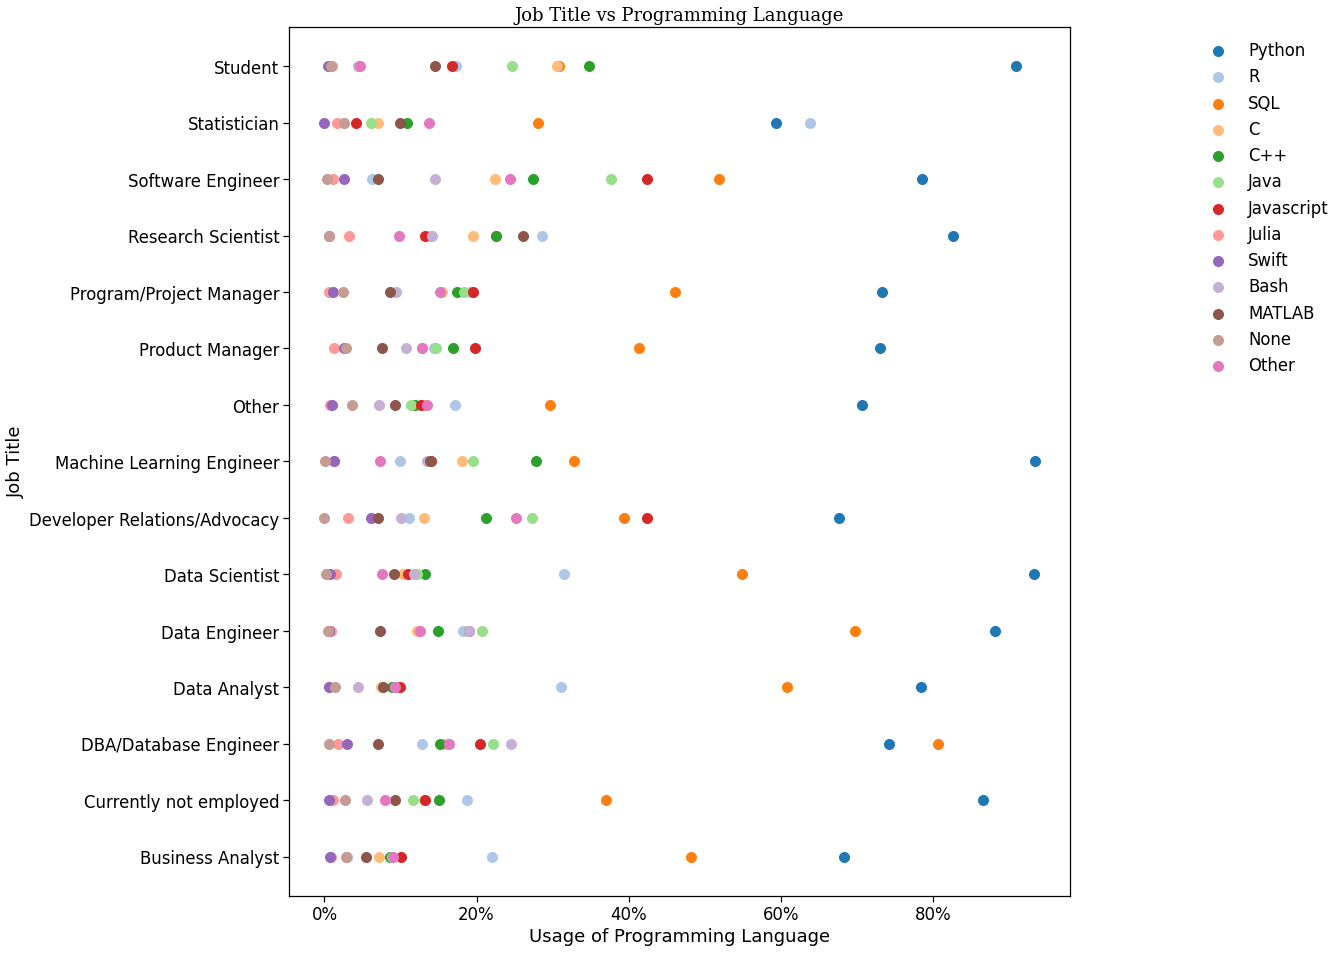

In [33]:
new_col_names ={'Q7_Part_1': 'Python',
                'Q7_Part_2': 'R',
                'Q7_Part_3': 'SQL',
                'Q7_Part_4': 'C',
                'Q7_Part_5': 'C++',
                'Q7_Part_6': 'Java',
                'Q7_Part_7': 'Javascript',
                'Q7_Part_8': 'Julia',
                'Q7_Part_9': 'Swift',
                'Q7_Part_10': 'Bash',
                'Q7_Part_11': 'MATLAB',
                'Q7_Part_12': 'None',
                'Q7_OTHER': 'Other'
                }
visualize_relation(7,20, new_col_names, 'Q5', 'Job Title', "Usage of Programming Language", "Job Title vs Programming Language", 150, 275)

# Job Title vs Specialized Hardware ⚙️🌶️

,NVIDIA GPUs,Google Cloud TPUs,AWS Trainium Chips,AWS Inferentia Chips,None,Other
Job Title,,,,,,
Business Analyst,18%,11%,2%,2%,55%,2%
Currently not employed,23%,10%,1%,1%,63%,4%
DBA/Database Engineer,26%,17%,2%,2%,53%,4%
Data Analyst,22%,13%,2%,2%,56%,4%
Data Engineer,34%,16%,3%,2%,49%,2%
Data Scientist,35%,16%,3%,2%,46%,4%
Developer Relations/Advocacy,35%,18%,4%,6%,33%,8%
Machine Learning Engineer,55%,19%,2%,3%,27%,4%
Other,22%,8%,1%,1%,57%,2%


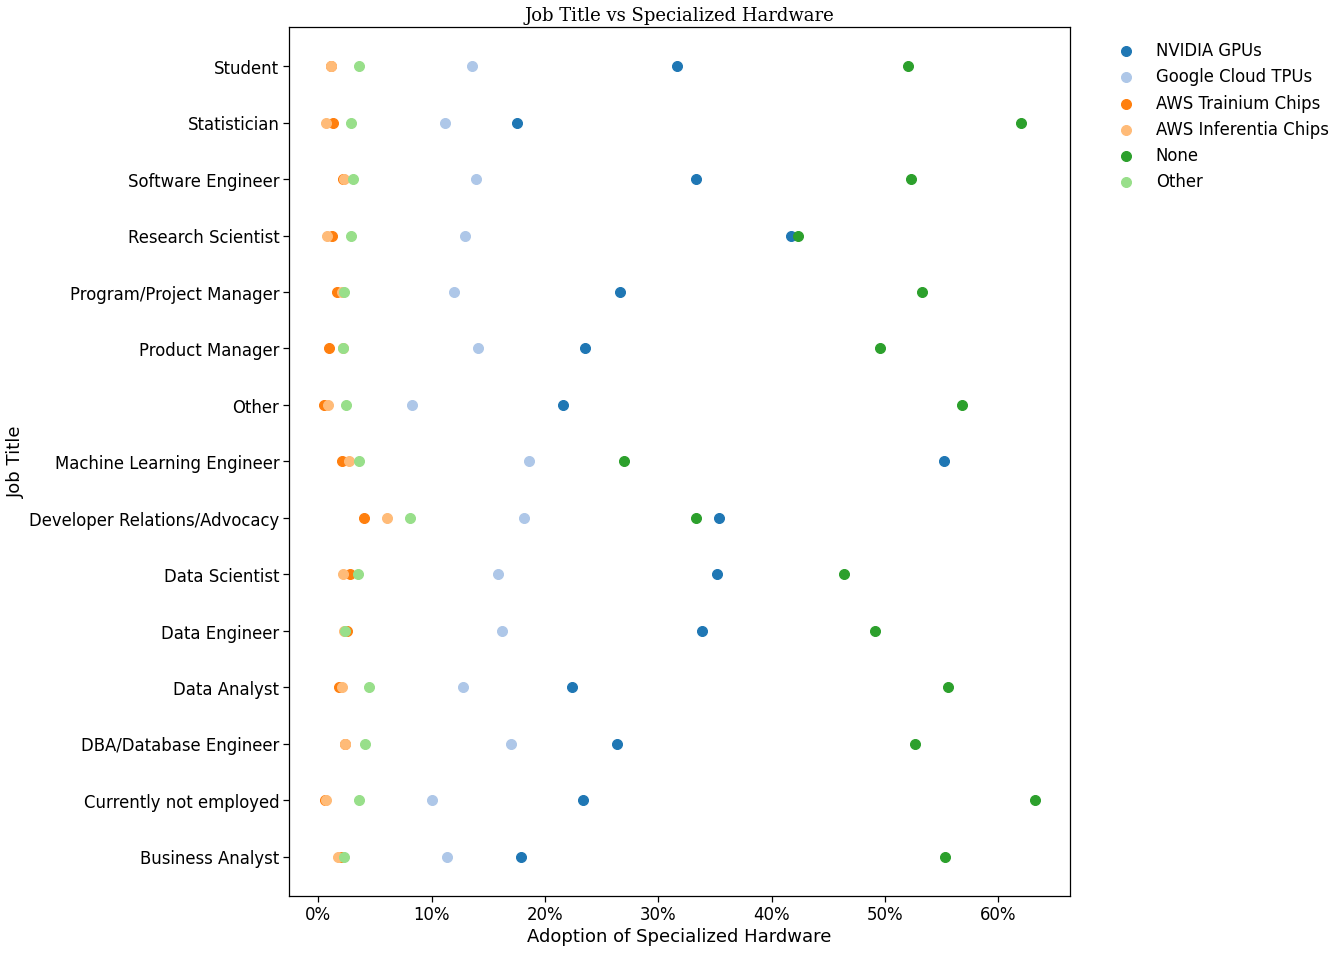

In [34]:
new_col_names ={'Q12_Part_1': 'NVIDIA GPUs',
                'Q12_Part_2': 'Google Cloud TPUs',
                'Q12_Part_3': 'AWS Trainium Chips',
                'Q12_Part_4': 'AWS Inferentia Chips',
                'Q12_Part_5': 'None',
                'Q12_OTHER': 'Other'
                }
visualize_relation(52,58, new_col_names, 'Q5', 'Job Title', "Adoption of Specialized Hardware", "Job Title vs Specialized Hardware", 50, 175 )

This is what my [project](https://wandb.ai/ruchi798/kaggle-survey?workspace=user-ruchi798) looks like on the W&B dashboard ⬇️
![](https://i.imgur.com/FDkPPbP.png)